
# Histograms

Histograms provide a neat way of visualizing data distribution. Morevoer, they reduce the data size by binning the data significantly: instead of storing each data point, that is N floats, we only need to store the bin content, which is a much smaller, and constant, number.

For large data sets, histograms are often the way to go.

While matplotlib provides a way to plot histograms, and numpy a way to bin data, they offer only basic functionality and do not help with other aspects like binning, axis labeling, etc.
Furthermore, matplotlib does not provide a way to plot an **already binned histogram**. With large amounts of data, it is maybe a necessity to bin the data before plotting it.

## hist

`hist` is a library that provides a way to create and manipulate histograms, it is highly performant and offers a lot of functionality around histograms

In [24]:
import hist
import mplhep
import numpy as np

In [55]:
nsamples = 10_000_000
array1 = np.random.normal(0, 1, nsamples)
array2 = np.random.normal(1, 3, nsamples)

In [56]:
bins, edges = np.histogramdd(np.stack([array1, array2], axis=-1), bins=6)

In [57]:
bins

array([[0.000000e+00, 7.700000e+01, 1.438000e+03, 1.611000e+03,
        1.840000e+02, 1.000000e+00],
       [1.070000e+02, 1.846200e+04, 2.302850e+05, 2.546780e+05,
        2.526200e+04, 1.930000e+02],
       [1.013000e+03, 1.815950e+05, 2.257698e+06, 2.506923e+06,
        2.508140e+05, 1.732000e+03],
       [7.770000e+02, 1.402460e+05, 1.751799e+06, 1.941040e+06,
        1.943490e+05, 1.390000e+03],
       [4.200000e+01, 8.220000e+03, 1.030690e+05, 1.143820e+05,
        1.171400e+04, 8.500000e+01],
       [1.000000e+00, 3.200000e+01, 3.170000e+02, 4.280000e+02,
        3.600000e+01, 0.000000e+00]])

We cannot easily plot them. No uncertainty bars, no labels, the binning is not clear, etc.

In [58]:
# Compose axis however you like; this is a 2D histogram
axis1 = hist.axis.Regular(6, -5, 5, name='x')
axis2 = hist.axis.Regular(6, -15, 20, name='y')
h = hist.Hist(axis1, axis2)

In [59]:
# Filling can be done with arrays, one per dimension
h.fill(x=array1, y=array2)

Hist(
  Regular(6, -5, 5, name='x'),
  Regular(6, -15, 20, name='y'),
  storage=Double()) # Sum: 9999994.0 (10000000.0 with flow)

In [30]:
# NumPy array view into histogram counts, no overflow bins
counts = h.view()
variances = h.variances()
print(f"counts = {counts}, variances = {variances}")

counts = [[3.000000e+00 3.290000e+02 2.597000e+03 1.246000e+03 2.600000e+01
  0.000000e+00]
 [1.630000e+02 3.489700e+04 2.923430e+05 1.426910e+05 3.437000e+03
  3.000000e+00]
 [1.579000e+03 3.347530e+05 2.789396e+06 1.362470e+06 3.285000e+04
  2.300000e+01]
 [1.603000e+03 3.352460e+05 2.789468e+06 1.363004e+06 3.278100e+04
  2.100000e+01]
 [1.570000e+02 3.511500e+04 2.925540e+05 1.435220e+05 3.411000e+03
  2.000000e+00]
 [2.000000e+00 3.240000e+02 2.618000e+03 1.325000e+03 3.600000e+01
  0.000000e+00]], variances = [[3.000000e+00 3.290000e+02 2.597000e+03 1.246000e+03 2.600000e+01
  0.000000e+00]
 [1.630000e+02 3.489700e+04 2.923430e+05 1.426910e+05 3.437000e+03
  3.000000e+00]
 [1.579000e+03 3.347530e+05 2.789396e+06 1.362470e+06 3.285000e+04
  2.300000e+01]
 [1.603000e+03 3.352460e+05 2.789468e+06 1.363004e+06 3.278100e+04
  2.100000e+01]
 [1.570000e+02 3.511500e+04 2.925540e+05 1.435220e+05 3.411000e+03
  2.000000e+00]
 [2.000000e+00 3.240000e+02 2.618000e+03 1.325000e+03 3.600000e+

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x74bf44dbb550>, cbar=<matplotlib.colorbar.Colorbar object at 0x74bf45343f50>, text=[])

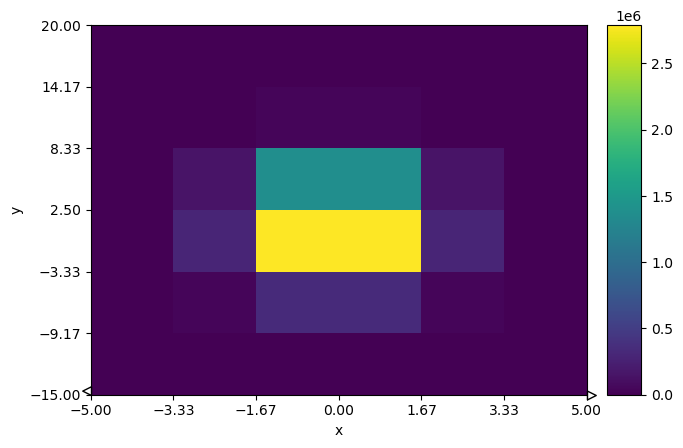

In [31]:
# Let's plot it
h.plot2d()

## Axes

A cental part of a histogram are the axes: They define the binning and other treats of the axis.

A Hist can have multiple axes of different types.

All axes are described [here](https://hist.readthedocs.io/en/latest/user-guide/axes.html#axes).



The most important types are


### Regular

This is an axis with lower, upper limits, **regularly** split into n bins.

```
axis_reg = hist.axis.Regular(nbins, lower, upper, name=name)
```

### Variable

A variable axis allows to set the bin edges arbitrarily using an array-like object.mro
```
axis_var = hist.axis.Variable([0, 0.5, 3.1, 3.4], name="eta")
```

## Axis Name

An axis has a name, which can be used as the identifier
when working with the histogram (instead of using plain integer indexes) and optionally a label, which can be used for plotting.

In [32]:
axisreg = hist.axis.Regular(bins=50, start=-10, stop=10, name="length", label="Length [cm]")

To create a histogram, we can pass one or multiple axes to a histogram

In [33]:
data_h = hist.Hist(axisreg)

In [34]:
data_h.fill(length=array1)

Hist(Regular(50, -10, 10, name='length', label='Length [cm]'), storage=Double()) # Sum: 10000000.0

In [35]:
data_h2 = hist.Hist(axisreg).fill(array1)  # we can also chain the commands

### Plotting with mplhep

As matplotlib doesn't offer a native way for plotting histograms, we can use the `hist` methods. Another way with more options is the `mplhep` package, which is (like all plotting shown here) a high-level interface to matplotlib.
In short, mplhep and hist work seamless together:

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x74bf44db0510>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

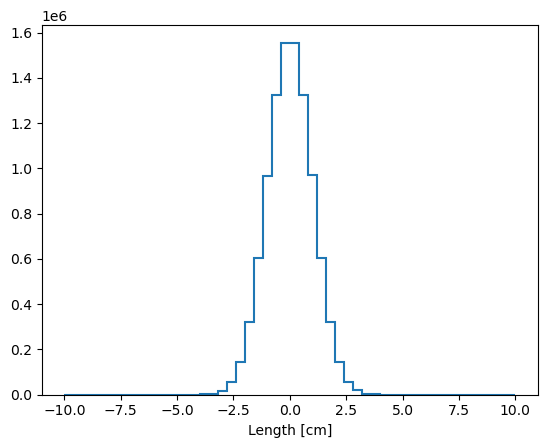

In [37]:
mplhep.histplot(data_h)

### Plotting with hist


As we've seen already, `hist` itself provides also plotting functionality

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x74bf447849d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

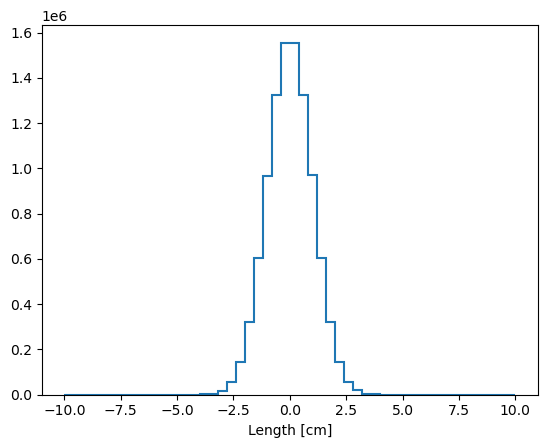

In [38]:
data_h.plot1d()

## Multiple dimensions

Histograms can be multiple dimensional. Let's add a dimension to it.

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x74bf448bb490>, cbar=<matplotlib.colorbar.Colorbar object at 0x74bf448bbf50>, text=[])

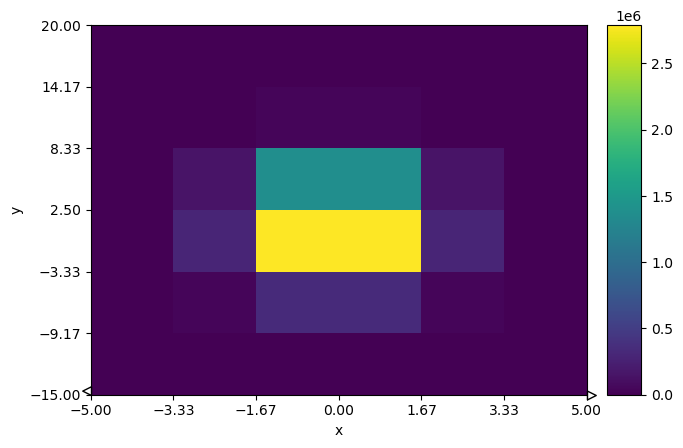

In [39]:
mplhep.hist2dplot(h)

## Access Bins

hist allows you to access the bins of your Hist by various ways. Besides the normal access by index, you can use locations (supported by boost-histogram), complex numbers, and the dictionary to access the bins.

In [41]:
# Access by bin number
h[3, 2]

2789468.0

## Getting Density

If you want to get the density of an existing histogram, .density() is capable to do it and will return you the density array without overflow and underflow bins.

A histogram is a count, so it's an **integral over a density**. To obtain the density, one can devide by the area of the bin, this gives the "average density" in a bin.

In [42]:
h.density()

array([[3.08571583e-08, 3.38400169e-06, 2.67120134e-05, 1.28160064e-05,
        2.67428705e-07, 0.00000000e+00],
       [1.67657227e-06, 3.58940751e-04, 3.00695807e-03, 1.46767959e-03,
        3.53520177e-05, 3.08571583e-08],
       [1.62411510e-05, 3.44317544e-03, 2.86909446e-02, 1.40139841e-02,
        3.37885883e-04, 2.36571547e-07],
       [1.64880082e-05, 3.44824630e-03, 2.86916852e-02, 1.40194767e-02,
        3.37176169e-04, 2.16000108e-07],
       [1.61485795e-06, 3.61183038e-04, 3.00912836e-03, 1.47622702e-03,
        3.50845890e-05, 2.05714389e-08],
       [2.05714389e-08, 3.33257309e-06, 2.69280135e-05, 1.36285782e-05,
        3.70285899e-07, 0.00000000e+00]])

## Projecting axes

We can also project onto a certain axis

In [44]:
hx = h.project("x")

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x74bf44770510>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

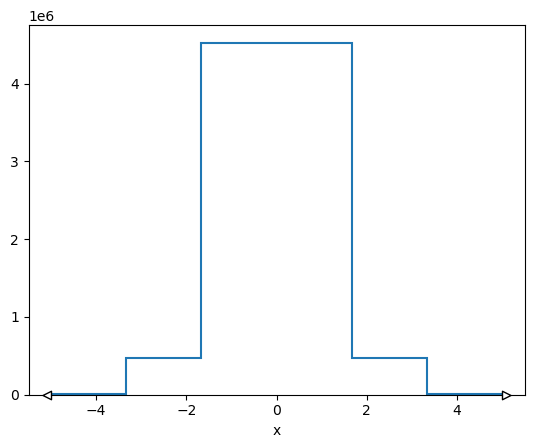

In [45]:
hx.plot1d()  # hx is now a 1D histogram

## Accessing everything relevant

Hist is transparent and let's us use many things

In [46]:
h.axes

(Regular(6, -5, 5, name='x'), Regular(6, -15, 20, name='y'))

In [47]:
h.axes['x']

Regular(6, -5, 5, name='x')

In [48]:
h.axes['x'].edges

array([-5.        , -3.33333333, -1.66666667,  0.        ,  1.66666667,
        3.33333333,  5.        ])

In [49]:
h.axes['x'].centers  # bin centers

array([-4.16666667, -2.5       , -0.83333333,  0.83333333,  2.5       ,
        4.16666667])

In [50]:
h.axes['x'].widths  # bin widths

array([1.66666667, 1.66666667, 1.66666667, 1.66666667, 1.66666667,
       1.66666667])

## Arithmetics

We can use the histograms to do math! We can multiply, add with each other or with scalars.

We can find the ratio between two histograms by dividing them

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x74bf449d9d50>, errorbar=None, legend_artist=None)]

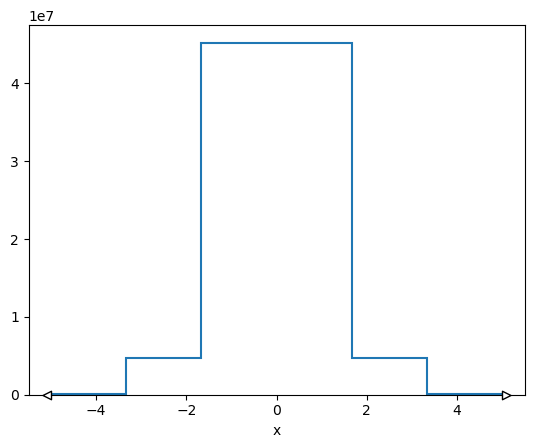

In [51]:
ratio_large = hx * 10
ratio_large.plot1d()

## Weights

Weights are an essential part in HEP histograms and hist fully supports weigths. We can simply give an array of weights when filling the histogram.

We first need to specify the storage type to be of type `Weight` in order to make sure we keep track of the weigths.

In [60]:
weight = np.random.normal(1., 0.1, size=nsamples)
storage = hist.storage.Weight()
h2d_weighted = hist.Hist(axis1, axis2, storage=storage).fill(x=array1, y=array2, weight=weight) # using names

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x74bf446ee1d0>, cbar=<matplotlib.colorbar.Colorbar object at 0x74bf47f23e90>, text=[])

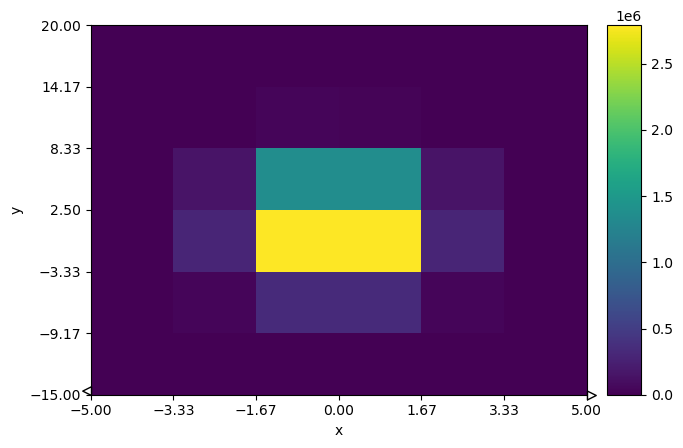

In [61]:
h2d_weighted.plot2d()

In [63]:
h2d_weighted.variances()

array([[8.70547725e-01, 3.21734402e+02, 2.73985666e+03, 1.38211627e+03,
        2.80868720e+01, 0.00000000e+00],
       [1.73164481e+02, 3.52006551e+04, 2.95471022e+05, 1.43314091e+05,
        3.41630651e+03, 4.25983967e+00],
       [1.59955400e+03, 3.37191586e+05, 2.81861117e+06, 1.37599982e+06,
        3.32480641e+04, 2.00893702e+01],
       [1.59175888e+03, 3.37825638e+05, 2.81854585e+06, 1.37602947e+06,
        3.26934615e+04, 2.47851985e+01],
       [1.55311510e+02, 3.50655947e+04, 2.96460739e+05, 1.44244352e+05,
        3.57774960e+03, 3.74202413e+00],
       [4.36764475e+00, 3.40338945e+02, 2.68505932e+03, 1.34811792e+03,
        2.69328289e+01, 0.00000000e+00]])

**Exercise**: implement a function that calculates a weighted chi2 using two histograms.